In [5]:
%load_ext autoreload
%autoreload 2

In [6]:
import os
import sys
sys.path.insert(0, '../src/')
from pathlib import Path
import pandas as pd
import pretty_midi
from collections import Counter
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.manifold import Isomap
import matplotlib.pyplot as plt
from preprocessing import MidiPathToPrettyMidi, InstrumentAwareBoN

In [7]:
bitmidi_folder = "../data/"
midi_files = [f for f in os.listdir(bitmidi_folder) if f.endswith(".mid")]
instrument_counter = Counter()

for filename in midi_files[:100]:  # adjust sample size as needed
    try:
        path = os.path.join(bitmidi_folder, filename)
        pm = pretty_midi.PrettyMIDI(path)
        for inst in pm.instruments:
            name = pretty_midi.program_to_instrument_name(inst.program) if not inst.is_drum else "drums"
            instrument_counter[name] += 1
    except Exception as e:
        print(f"Error reading {filename}: {e}")

# View most common instruments
for name, count in instrument_counter.most_common(15):
    print(f"{name}: {count}")

drums: 22
Acoustic Grand Piano: 7
String Ensemble 1: 5
Electric Guitar (clean): 4
Voice Oohs: 4
Alto Sax: 4
Electric Guitar (muted): 4
Synth Brass 1: 4
Fretless Bass: 4
Marimba: 4
Distortion Guitar: 3
Flute: 3
Slap Bass 1: 3
Steel Drums: 3
Electric Bass (finger): 2


In [8]:
FIXED_INSTRUMENTS = [
    "drums",
    "acoustic grand piano",
    "string ensemble 1",
    "electric guitar (clean)",
    "voice oohs"
    "alto sax",
]

In [9]:
pipeline_instr_bon = Pipeline([
    ('loader', MidiPathToPrettyMidi(Path("../data/"))),
    ('BoN_instr', InstrumentAwareBoN(instruments=FIXED_INSTRUMENTS)),
    ('pca', PCA(2))
])

X_instr = pipeline_instr_bon.fit_transform(midi_files)


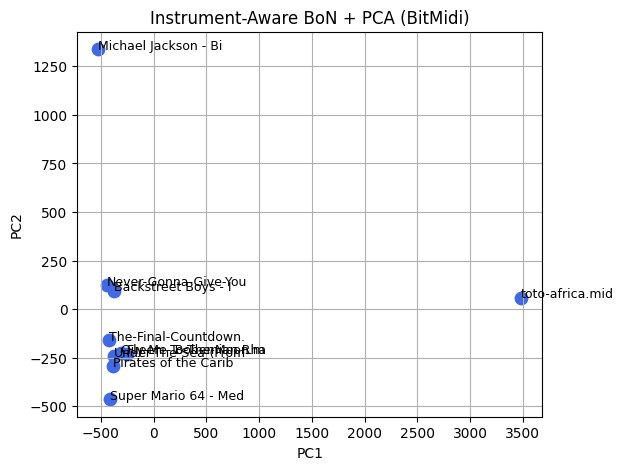

In [10]:
plt.figure(figsize=(6, 5))
plt.scatter(X_instr[:, 0], X_instr[:, 1], c='royalblue', s=80)

for i, fname in enumerate(midi_files):
    plt.text(X_instr[i, 0] + 0.1, X_instr[i, 1], fname[:20], fontsize=9)

plt.title("Instrument-Aware BoN + PCA (BitMidi)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.show()


In [12]:
pipeline_instr_bon_iso = Pipeline([
    ('loader', MidiPathToPrettyMidi(Path("../data/"))),
    ('BoN_instr', InstrumentAwareBoN(instruments=FIXED_INSTRUMENTS)),
    ('isomap', Isomap(n_components=2, n_neighbors=3))
])

X_instr_iso = pipeline_instr_bon_iso.fit_transform(midi_files)

/Users/paulinacucalon/Desktop/OMS/ISYE 6740/PROJECT/melodies_1/vmelodies/lib/python3.11/site-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


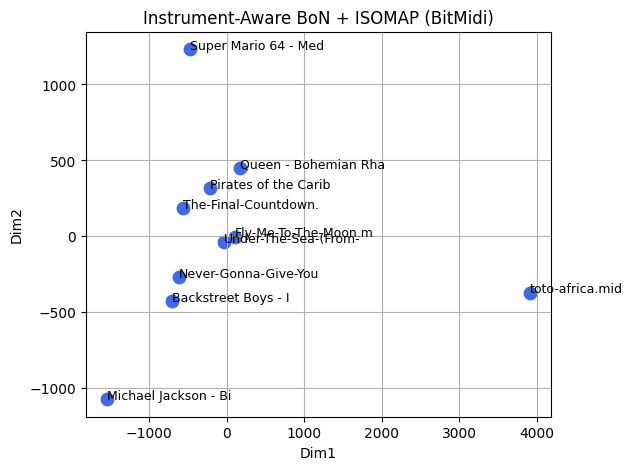

In [13]:
plt.figure(figsize=(6, 5))
plt.scatter(X_instr_iso[:, 0], X_instr_iso[:, 1], c='royalblue', s=80)

for i, fname in enumerate(midi_files):
    plt.text(X_instr_iso[i, 0] + 0.1, X_instr_iso[i, 1], fname[:20], fontsize=9)

plt.title("Instrument-Aware BoN + ISOMAP (BitMidi)")
plt.xlabel("Dim1")
plt.ylabel("Dim2")
plt.grid(True)
plt.show()


In [14]:
data_dir = Path('../maestro/maestro-v3.0.0/')

In [15]:
#MAESTRO
pipeline_instr_bon_maestro = Pipeline([
    ('loader', MidiPathToPrettyMidi(data_dir)),
    ('BoN_instr', InstrumentAwareBoN(instruments=FIXED_INSTRUMENTS)),
    ('pca', PCA(2))
])

df = pd.read_csv(data_dir / 'maestro-v3.0.0.csv')
sample = df.sample(300)
X_instr_maestro = pipeline_instr_bon_maestro.fit_transform(sample.midi_filename)

In [16]:
def get_color(composer):
    if composer == 'Franz Schubert':
        return 'r'
    if composer == 'Frédéric Chopin':
        return 'g'
    if composer == 'Franz Liszt':
        return 'b'
    if composer == 'Johann Sebastian Bach':
        return 'c'
    if composer == 'Ludwig van Beethoven':
        return 'm'
    return 'k'
sample.canonical_composer.value_counts()

canonical_composer
Franz Schubert                                   49
Frédéric Chopin                                  43
Franz Liszt                                      40
Ludwig van Beethoven                             39
Johann Sebastian Bach                            31
Sergei Rachmaninoff                              13
Felix Mendelssohn                                12
Robert Schumann                                  12
Domenico Scarlatti                                8
Johannes Brahms                                   8
Wolfgang Amadeus Mozart                           7
Joseph Haydn                                      6
Claude Debussy                                    4
Modest Mussorgsky                                 3
Alexander Scriabin                                3
George Frideric Handel                            3
César Franck                                      2
Pyotr Ilyich Tchaikovsky                          2
Pyotr Ilyich Tchaikovsky / Mikhail Pletnev   

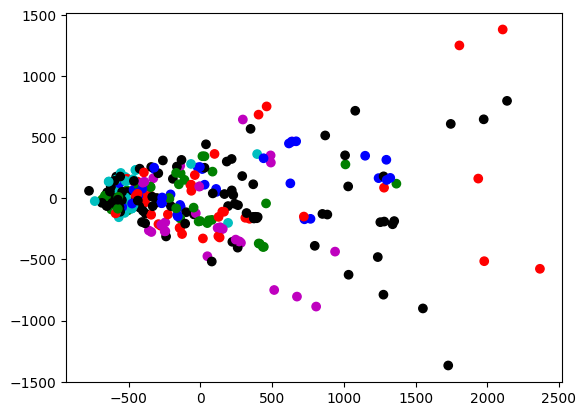

In [17]:
plt.scatter(X_instr_maestro[:, 0], X_instr_maestro[:, 1], c=[get_color(comp) for comp in sample.canonical_composer])
plt.show()

so adding the instruments does not change results for maestro - which is good since it only has one instrument we wouldn't want it to be affected. 